In [2]:
import xarray as xr
import rioxarray as rxr
from pathlib import Path
from datetime import datetime

In [3]:
PATH = Path('Z:/nahaUsers/casadje/Guadiana/GloFAS/maps/')
filename = 'gauges.nc'

In [6]:
# nc_file = list((PATH_GLOFAS / dataset / 'tables' / 'map_tables').glob('*.nc'))[0]
nc_file = PATH / filename
print(nc_file)
ds = xr.open_dataset(nc_file)
ds = ds.sortby('lat', ascending=False)

ds

Z:\nahaUsers\casadje\Guadiana\GloFAS\maps\gauges.nc


<xarray.Dataset>
Dimensions:  (lat: 60, lon: 122)
Coordinates:
  * lat      (lat) float64 40.13 40.08 40.03 39.98 ... 37.33 37.28 37.23 37.18
  * lon      (lon) float64 -8.175 -8.125 -8.075 -8.025 ... -2.225 -2.175 -2.125
Data variables:
    Band1    (lat, lon) float32 ...
Attributes:
    Conventions:          CF-1.5
    GDAL:                 GDAL 3.5.3, released 2022/10/21
    history:              Mon Mar 17 14:28:00 2025: GDAL Create( Z:/nahaUsers...
    GDAL_esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["...
    GDAL_standard_name:   area
    GDAL_long_name:       gauges
    GDAL_contributors:    Juliana Disperati <juliana.disperati@ext.ec.europa.eu>
    GDAL_creator:         Jesús Casado Rodríguez <jesus.casado-rodriguez@ec.e...
    GDAL_creator_name:    casadje
    GDAL_history:         Created Mon Mar 17 14:27:38 2025
    GDAL_institution:     Joint Research Centre - European Commission
    GDAL_references:      https://www.globaldamwatch.org/grand

In [7]:
ds = ds.rename({'Band1': 'gauges'})

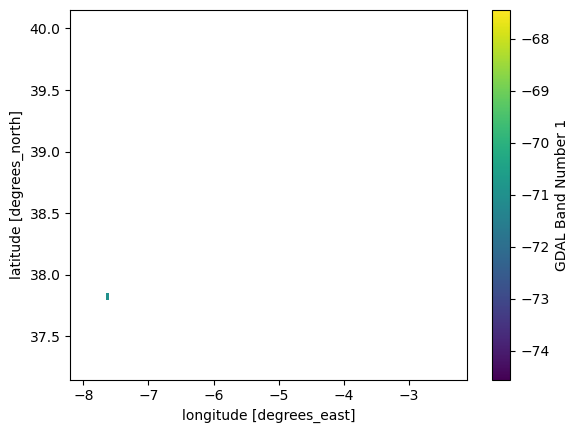

In [10]:
ds['gauges'].plot();

In [13]:
yyyymmdd = datetime.now().strftime('%Y%m%d')
if '_' in nc_file.stem:
    filename = '_'.join(nc_file.stem.split('_')[:-1])
else:
    filename = nc_file.stem
out_file = f'{nc_file.parent}/{filename}_{yyyymmdd}{nc_file.suffix}'
ds.to_netcdf(out_file)
print(out_file)

Z:\nahaUsers\casadje\Guadiana\GloFAS\maps/gauges_20250318.nc


In [14]:
mask = xr.open_dataarray(PATH / 'my_mask.nc')

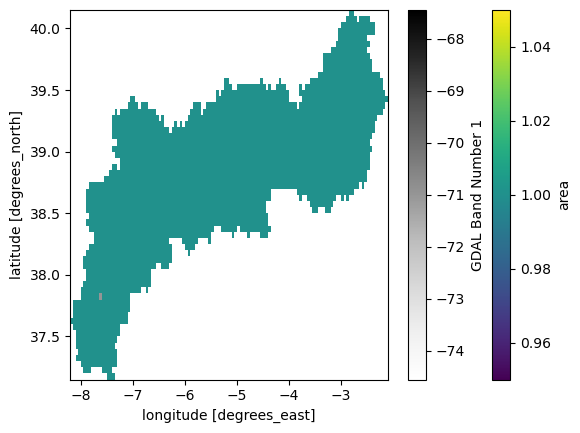

In [19]:
mask.plot()
ds['gauges'].plot(cmap='Greys')

In [24]:
ds['gauges']

<xarray.DataArray 'gauges' (lat: 60, lon: 122)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 40.13 40.08 40.03 39.98 ... 37.33 37.28 37.23 37.18
  * lon      (lon) float64 -8.175 -8.125 -8.075 -8.025 ... -2.225 -2.175 -2.125
Attributes:
    long_name:    GDAL Band Number 1
    valid_range:  [-128  127]

In [30]:
ds.where(ds['gauges'].notnull(), drop=True).lon

<xarray.DataArray 'lon' (lon: 1)>
array([-7.625])
Coordinates:
  * lon      (lon) float64 -7.625
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east

In [27]:
ds['gauges'] == 1

<xarray.DataArray 'gauges' (lat: 60, lon: 122)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lat      (lat) float64 40.13 40.08 40.03 39.98 ... 37.33 37.28 37.23 37.18
  * lon      (lon) float64 -8.175 -8.125 -8.075 -8.025 ... -2.225 -2.175 -2.125

In [25]:
ds['gauges'].dropna('lat')

<xarray.DataArray 'gauges' (lat: 0, lon: 122)>
array([], shape=(0, 122), dtype=float32)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 -8.175 -8.125 -8.075 -8.025 ... -2.225 -2.175 -2.125
Attributes:
    long_name:    GDAL Band Number 1
    valid_range:  [-128  127]